# Plots

Unless otherwise specified the plots are of the first member index in accordance with Shen (2022). "Note that only the first ensemble member (index of “r1i1p1f1”) is selected from each model"

In [1]:
import cf_xarray # use cf-xarray so that we can use CF attributes
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import nc_time_axis
import numpy as np
import xarray as xr
import regionmask
import scienceplots
from glob import glob
import os
plt.style.use(["science", "nature"])
%matplotlib inline

from importlib import reload

## Read in datafiles and mask

In [2]:
files = glob(os.getcwd()+'/data/*.nc')
cesm2 = {}
for f in files:
    # Open the dataset
    ds = xr.open_dataset(f).squeeze()
    # For '/glade/u/home/valencig/wind-trend-analysis/ScenarioMIP.NCAR.CESM2.ssp370.day.gn.mean.nc'
    # Key will be ssp370.mean
    key1 = f.split('/')[-1].split('.')[-5]
    key2 = f.split('/')[-1].split('.')[-2]
    cesm2[key1+'.'+key2] = ds
cesm2.keys()

dict_keys(['ssp245.50yrmax', 'ssp126.anomaly', 'ssp370.mean', 'ssp245.mean', 'ssp126.50yrmax', 'ssp585.anomaly', 'ssp370.50yrmax', 'ssp126.mean', 'ssp585.mean', 'ssp585.50yrmax', 'ssp245.anomaly', 'historical.mean', 'ssp370.anomaly', 'historical.anomaly'])

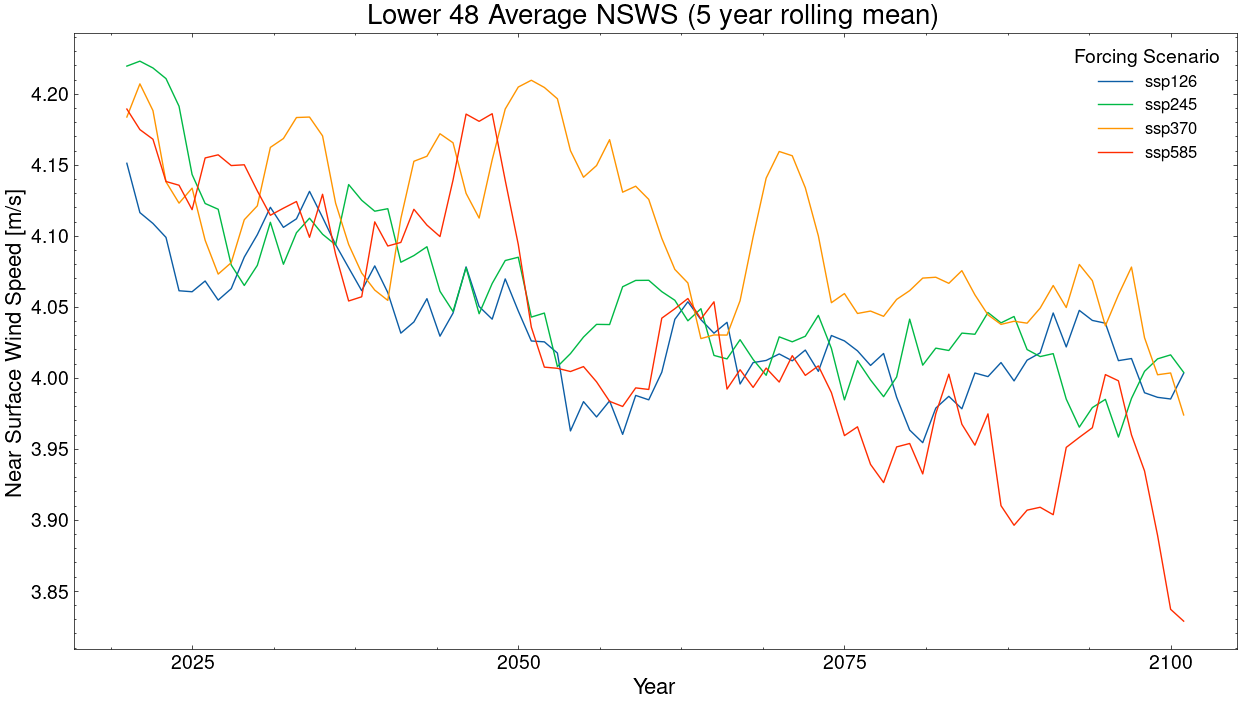

In [3]:
# Figure out nice way to add error bars?
import fig_timeseries
reload(fig_timeseries)
from fig_timeseries import fig_timeseries
fig_timeseries(cesm2)

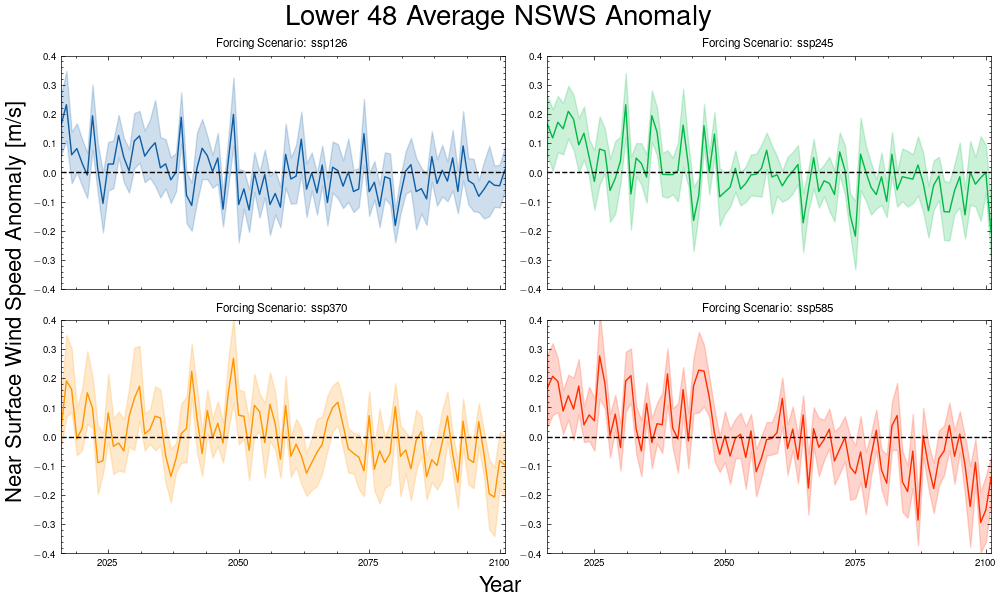

In [4]:
import fig_anomaly
reload(fig_anomaly)
from fig_anomaly import fig_anomaly
fig_anomaly(cesm2)

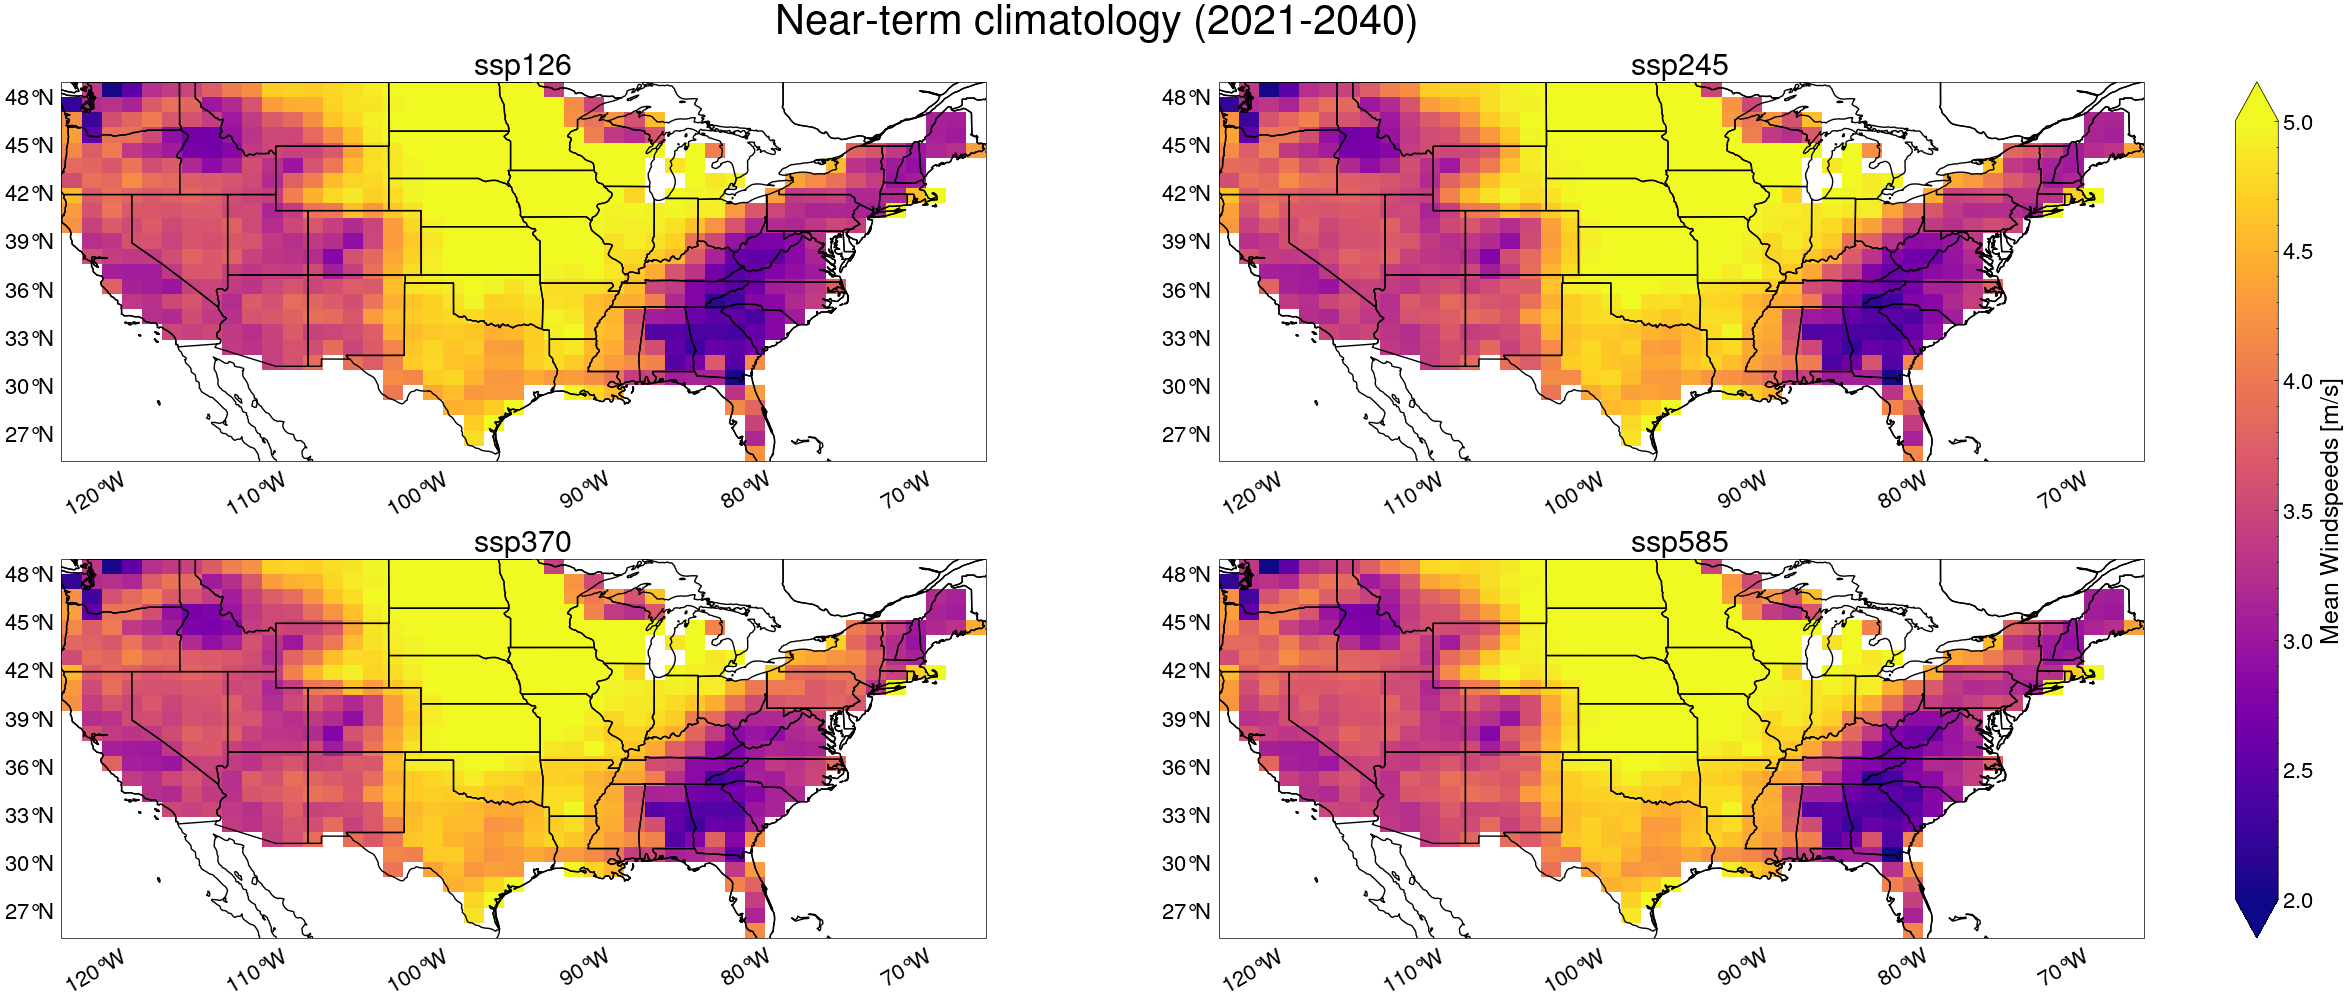

In [38]:
import fig_climatology
reload(fig_climatology)
from fig_climatology import fig_climatology
# Shen (2022) uses: 2021–2040 (the “near-term”), 2041–2060 (the “mid-term”), and 2081–2100 (the “long-term”)
fig_climatology(cesm2, period='Near-term')

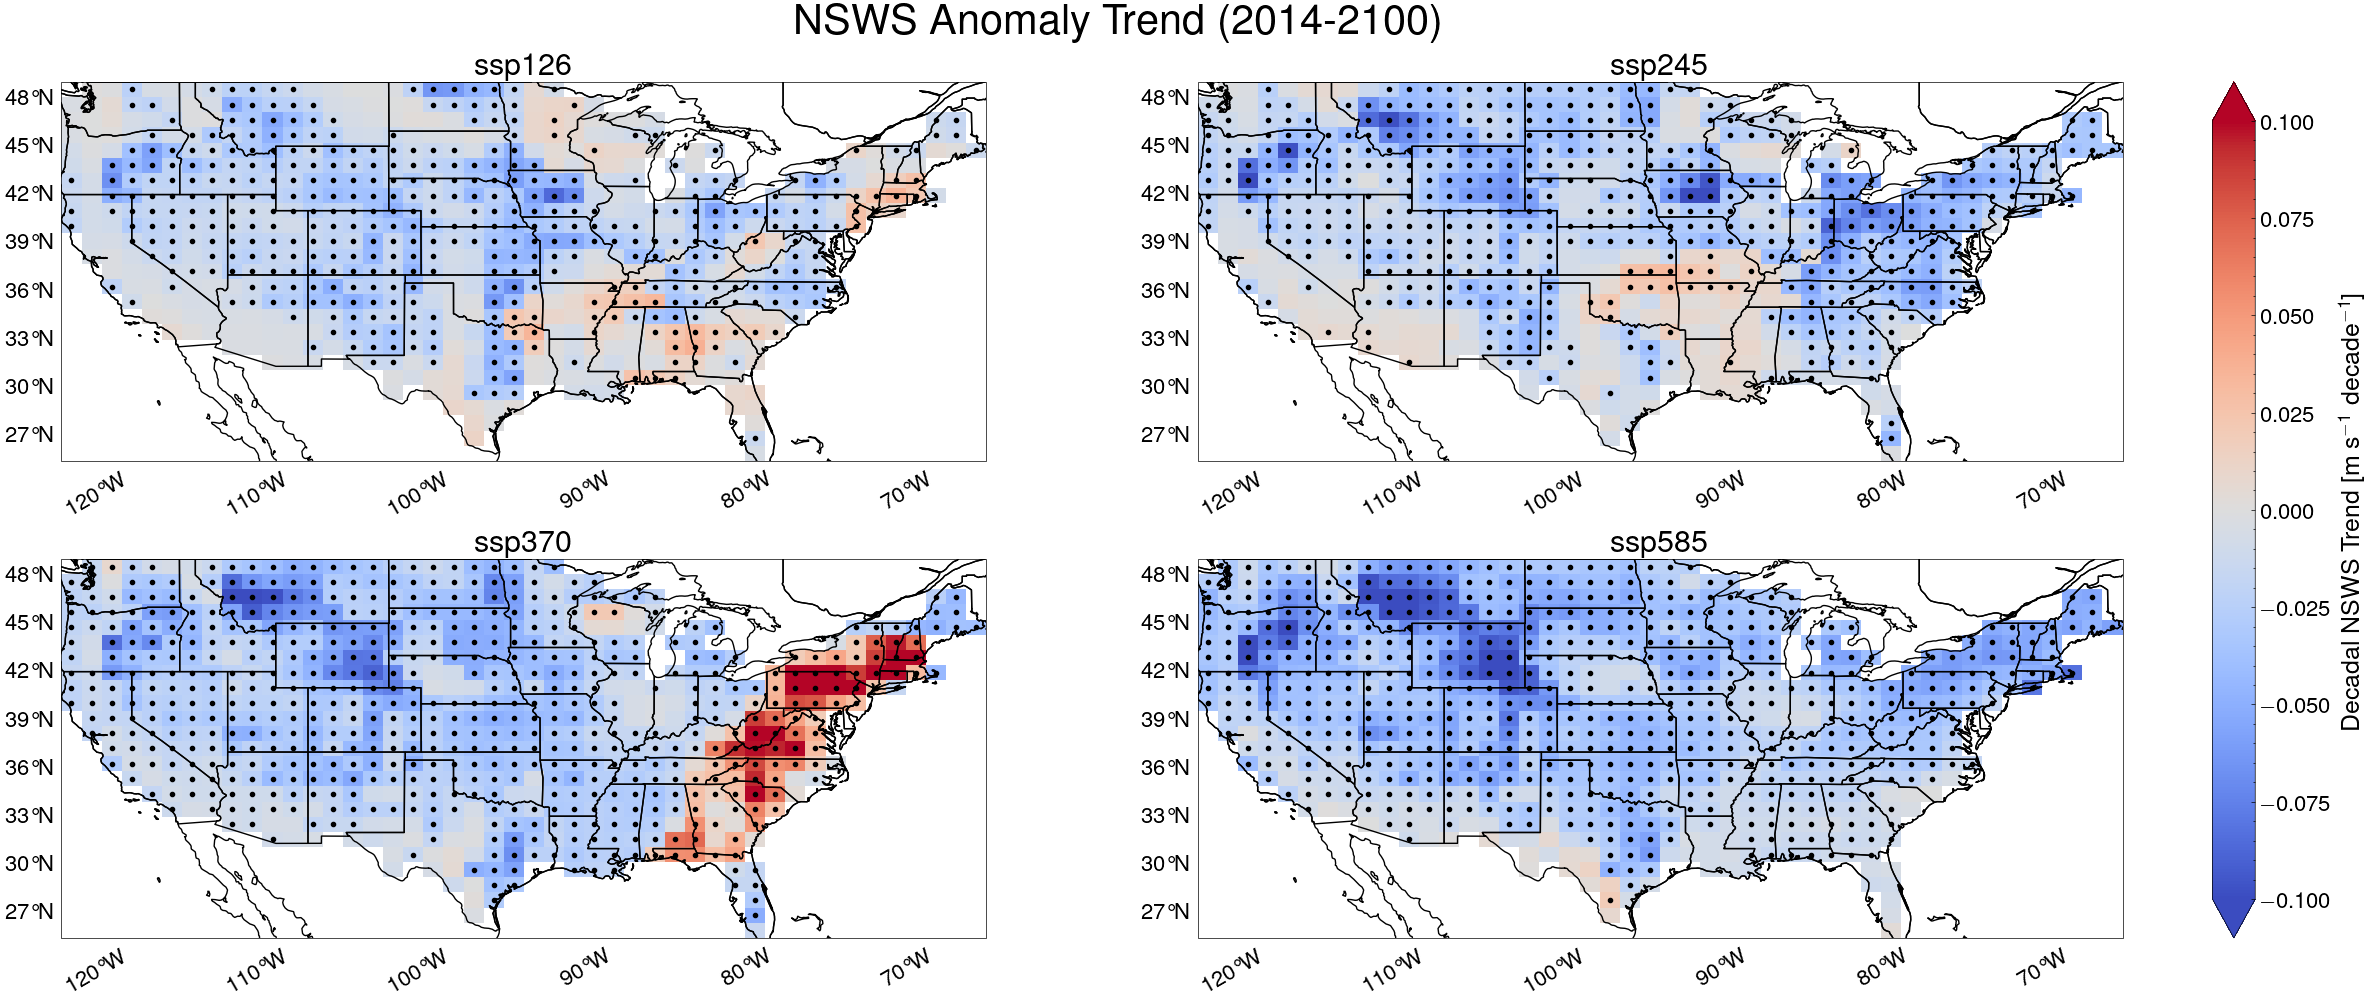

In [39]:
import fig_lineartrend
reload(fig_lineartrend)
from fig_lineartrend import fig_lineartrend
fig_lineartrend(cesm2)

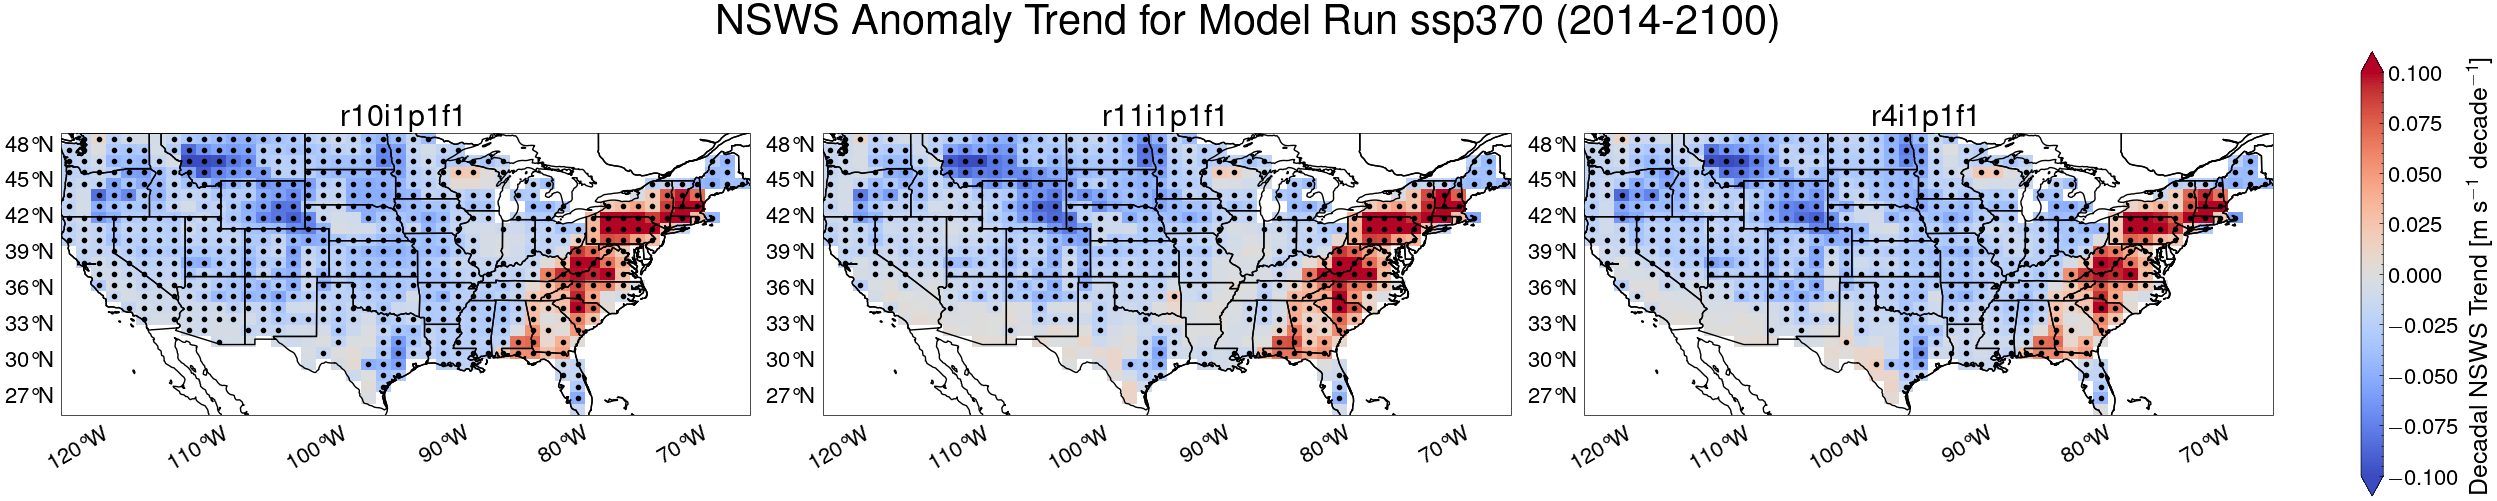

In [40]:
import fig_lineartrend_members
reload(fig_lineartrend_members)
from fig_lineartrend_members import fig_lineartrend_members
fig_lineartrend_members(cesm2, model='ssp370')

Control Grid/Balancing Authority Area shapefiles are from [Geospatial Management Office](https://hifld-geoplatform.opendata.arcgis.com/datasets/geoplatform::control-areas/about)

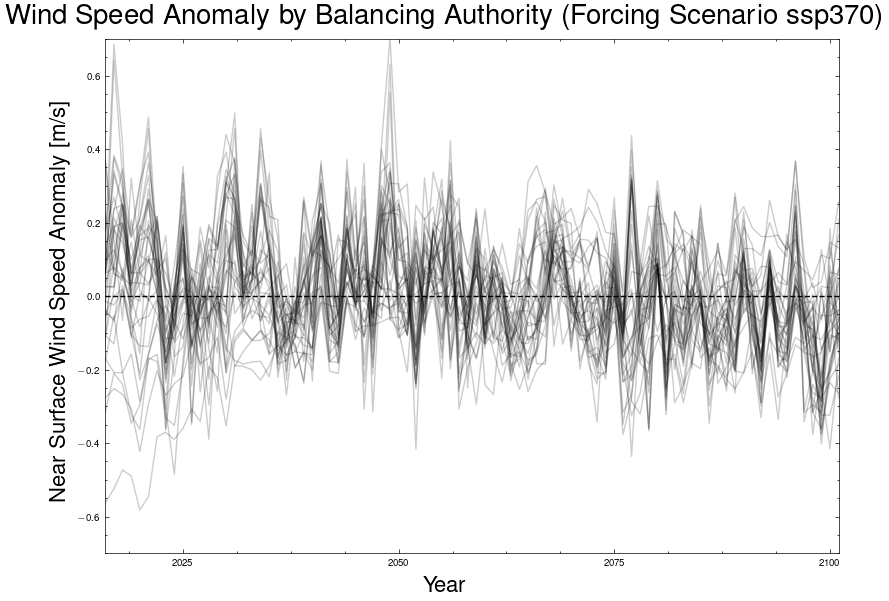

In [60]:
import fig_anomaly_power_grid
reload(fig_anomaly_power_grid)
from fig_anomaly_power_grid import fig_anomaly_power_grid
fig_anomaly_power_grid(cesm2, model='ssp370')

### Working on 50 year max

Using the  annual maximum method with Gumbel distribution from [Palutikof et al., 1999](https://rmets.onlinelibrary.wiley.com/doi/pdfdirect/10.1017/s1350482799001103). Sourced from [this paper](https://meetingorganizer.copernicus.org/ECSS2019/ECSS2019-218-3.pdf) from the European Conference on Storms (2019). "To calculate the extreme wind speeds at the 50-year
return interval, the maximum annual wind speeds were arranged in descending order and plotted against the
Gumbel reduced variate, which is calculated from the index position and linked to the return period"

Try using [XClim](https://xclim.readthedocs.io/en/stable/notebooks/frequency_analysis.html)
Source code: https://xclim.readthedocs.io/en/stable/_modules/xclim/indices/stats.html#

In [14]:
cesm2['ssp370.mean']

<xarray.Dataset>
Dimensions:         (lat: 25, lon: 46, member_id: 3, time: 86)
Coordinates:
  * lat             (lat) float64 25.92 26.86 27.8 28.74 ... 46.65 47.59 48.53
  * lon             (lon) float64 236.2 237.5 238.8 240.0 ... 290.0 291.2 292.5
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' 'r4i1p1f1'
    dcpp_init_year  float64 nan
  * time            (time) object 2015-12-31 00:00:00 ... 2100-12-31 00:00:00
Data variables:
    sfcWind         (member_id, time, lat, lon) float32 ...

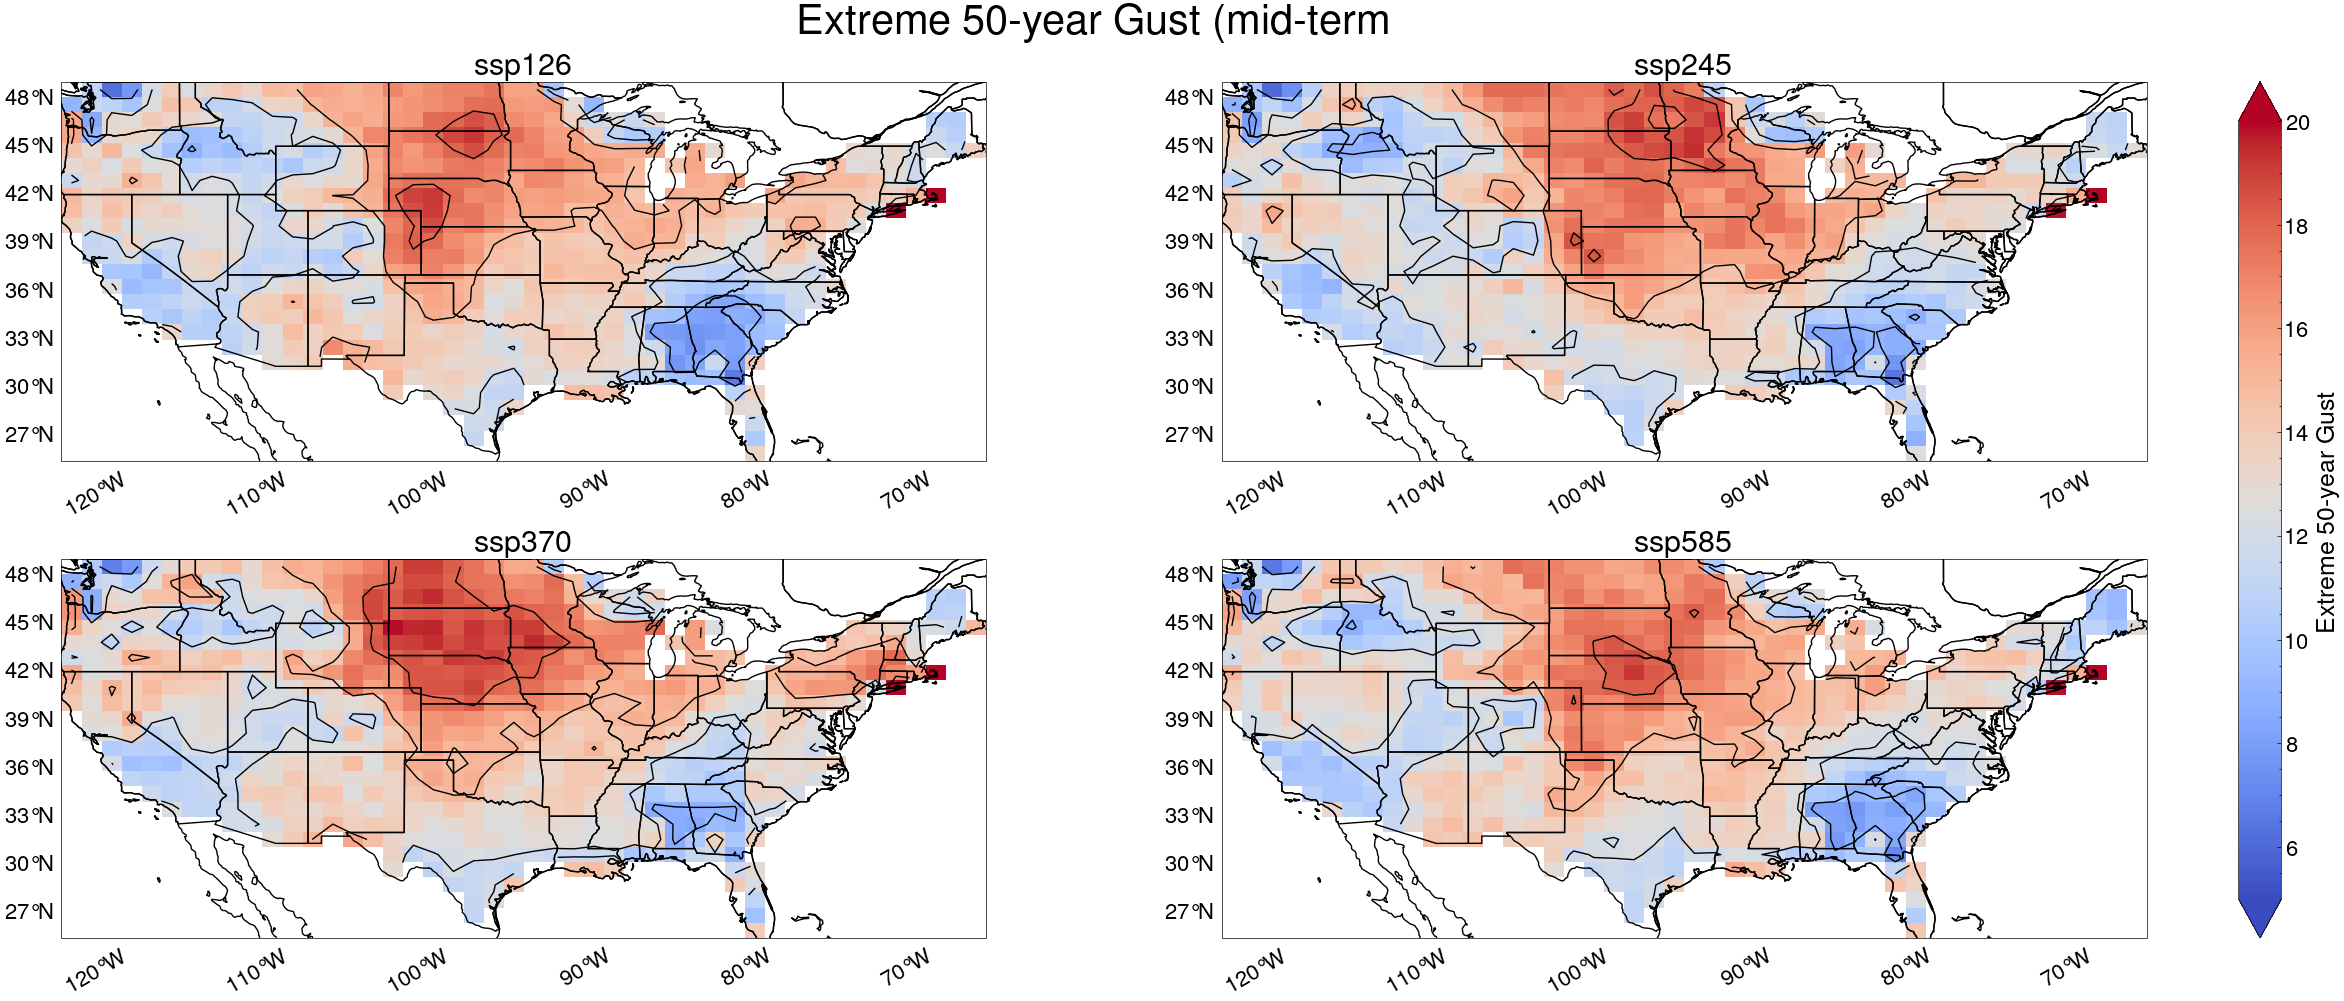

In [15]:
# Calculate and plot Extreme 50 year gust! https://www.wikiwand.com/en/IEC_61400
import fig_50yearmax
reload(fig_50yearmax)
from fig_50yearmax import fig_50yearmax
fig_50yearmax(cesm2, forecast='mid')